## Caracterización

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = "Datos_Icte_p.xlsx"
data = pd.read_excel(data)
data

,CorrienteCampo (A),B (mT),B_err (mT),B_rounded (mT),B_err_rounded (mT),VH_-20mA (mV),VH_-10mA (mV),VH_10mA (mV),VH_20mA (mV),VH_err (mV)
0,-1.4,-321.16,0.135558,-321.20,0.10,30.2,19.7,-11.2,-26.4,0.1
1,-1.2,-275.45,0.119013,-275.50,0.10,26.2,17.4,-9.8,-23.0,0.1
2,-1.0,-229.74,0.102956,-229.70,0.10,22.2,15.1,-8.3,-19.6,0.1
3,-0.8,-184.03,0.087658,-184.03,0.09,17.9,12.3,-6.6,-15.9,0.1
4,-0.6,-138.32,0.073593,-138.32,0.07,13.2,9.7,-4.8,-11.9,0.1
5,-0.4,-92.61,0.061612,-92.61,0.06,8.5,7.1,-3.0,-7.8,0.1
6,-0.2,-46.90,0.053141,-46.90,0.05,4.1,1.6,-1.1,-3.7,0.1
7,0.0,-1.19,0.050000,-1.19,0.05,1.0,1.0,0.9,0.3,0.1
8,0.2,44.52,0.053141,44.52,0.05,-3.5,-1.5,2.6,4.2,0.1
9,0.4,90.23,0.061612,90.23,0.06,-8.0,-4.2,4.5,8.2,0.1


In [2]:
X = data['B_rounded (mT)']
Xerr = data['B_err_rounded (mT)']

Y = data['VH_-20mA (mV)']
Yerr = data['VH_err (mV)']

w = 1/(Yerr**2)

In [3]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [4]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [5]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

-0.09503346141401475
0.11383027014776081
0.00013073119253263727
0.025820355543282828


In [6]:
model1 = (-0.0950)*X + (0.11)

Text(0, 0.5, 'Voltaje de Hall (mV)')

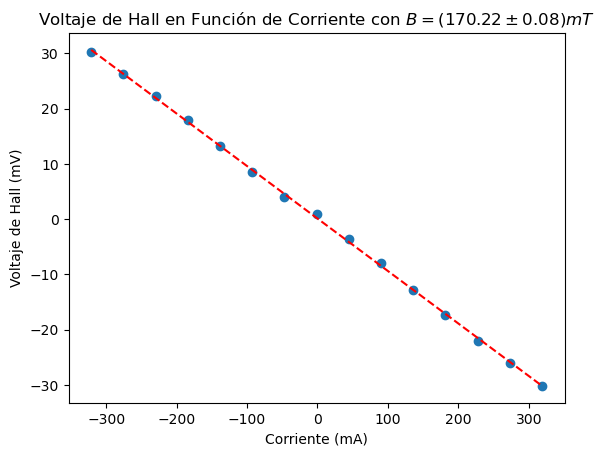

In [7]:
plt.scatter(X, Y)
plt.plot(X, model1, color = 'red', linestyle='--')
plt.title('Voltaje de Hall en Función de Corriente con ' + r'$B = (170.22\pm 0.08)mT$')
plt.xlabel('Corriente (mA)')
plt.ylabel('Voltaje de Hall (mV)')
#plt.savefig('Bcte_p_0.75A.png', format='png')

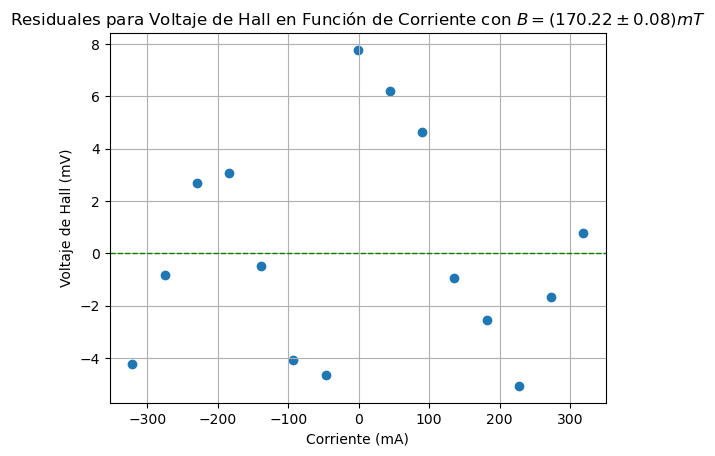

In [8]:
res = (Y - model1)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_xlabel('Corriente (mA)')
ax2.set_ylabel('Voltaje de Hall (mV)')
ax2.set_title('Residuales para Voltaje de Hall en Función de Corriente con ' + r'$B = (170.22\pm 0.08)mT$')
ax2.grid()

plt.savefig('Bcte_p_0.75A_residual.png', format='png')

In [9]:
Y = data['VH_-10mA (mV)']

w = 1/(Yerr**2)

In [10]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [11]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [12]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

-0.05811067115233892
1.1710032631184564
0.00013073119253263727
0.025820355543282828


In [13]:
model2 = (-0.0581)*X + (1.17)

Text(0, 0.5, 'Voltaje de Hall (mV)')

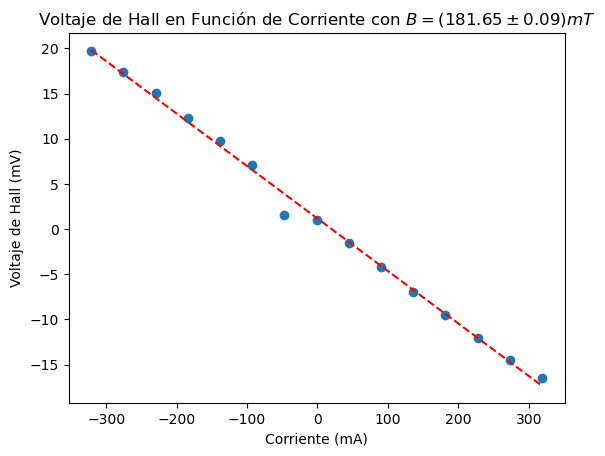

In [14]:
plt.scatter(X, Y)
plt.plot(X, model2, color = 'red', linestyle='--')
plt.title('Voltaje de Hall en Función de Corriente con ' + r'$B = (181.65\pm 0.09)mT$')
plt.xlabel('Corriente (mA)')
plt.ylabel('Voltaje de Hall (mV)')
#plt.savefig('Bcte_p_0.80A.png', format='png')

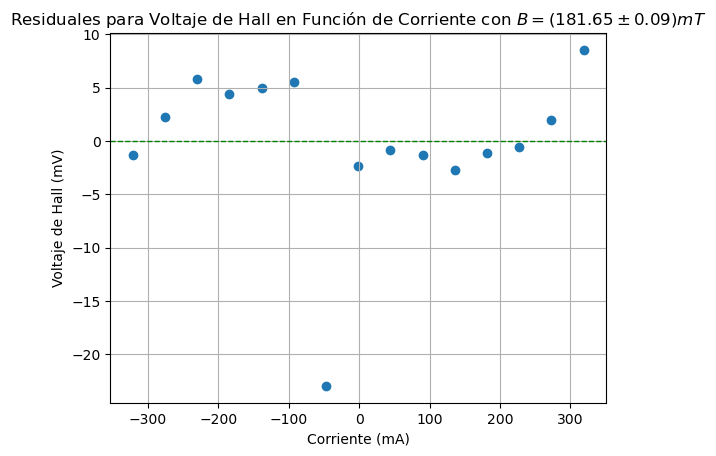

In [15]:
res = (Y - model2)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_xlabel('Corriente (mA)')
ax2.set_ylabel('Voltaje de Hall (mV)')
ax2.set_title('Residuales para Voltaje de Hall en Función de Corriente con ' + r'$B = (181.65\pm 0.09)mT$')
ax2.grid()

plt.savefig('Bcte_p_0.80A_residual.png', format='png')

In [16]:
Y = data['VH_10mA (mV)']

w = 1/(Yerr**2)

In [17]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [18]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [19]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

0.038735230686504085
0.8126582972351089
0.00013073119253263727
0.025820355543282828


In [20]:
model3 = (0.0387)*X + (0.81)

Text(0, 0.5, 'Voltaje de Hall (mV)')

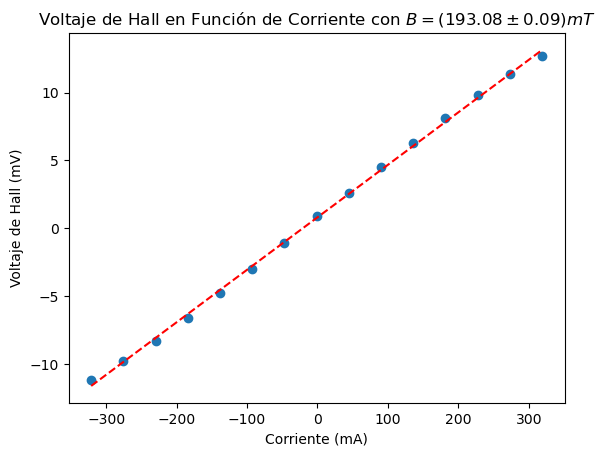

In [21]:
plt.scatter(X, Y)
plt.plot(X, model3, color = 'red', linestyle='--')
plt.title('Voltaje de Hall en Función de Corriente con ' + r'$B = (193.08\pm 0.09)mT$')
plt.xlabel('Corriente (mA)')
plt.ylabel('Voltaje de Hall (mV)')
#plt.savefig('Bcte_p_0.85A.png', format='png')

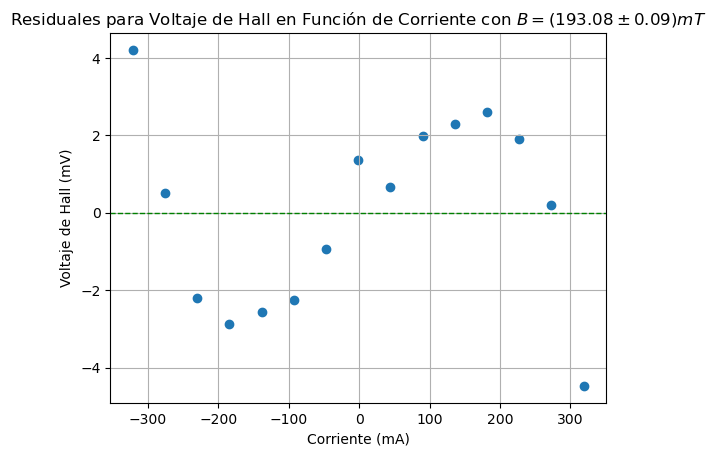

In [22]:
res = (Y - model3)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_xlabel('Corriente (mA)')
ax2.set_ylabel('Voltaje de Hall (mV)')
ax2.set_title('Residuales para Voltaje de Hall en Función de Corriente con ' + r'$B = (193.08\pm 0.09)mT$')
ax2.grid()

plt.savefig('Bcte_p_0.85A_residual.png', format='png')

In [23]:
Y = data['VH_20mA (mV)']

w = 1/(Yerr**2)

In [24]:
sum_w = w.sum()
sum_wx = (w*X).sum()
sum_wy = (w*Y).sum()
sum_wxx = (w*X**2).sum()
sum_wxy = (w*X*Y).sum()

In [25]:
m = (sum_w*sum_wxy - sum_wx*sum_wy) / (sum_w*sum_wxx - sum_wx**2)
b = (sum_wxx*sum_wy - sum_wx*sum_wxy) / (sum_w*sum_wxx - sum_wx**2)

m_std_err = np.sqrt(sum_w/(sum_w*sum_wxx-sum_wx**2))
b_std_err = np.sqrt(sum_wxx/(sum_w*sum_wxx-sum_wx**2))

In [26]:
print(m)
print(b)

print(m_std_err)
print(b_std_err)

0.0854316036116053
0.35476912402151195
0.00013073119253263727
0.025820355543282828


In [27]:
model4 = (0.0854)*X + (0.35)

Text(0, 0.5, 'Voltaje de Hall (mV)')

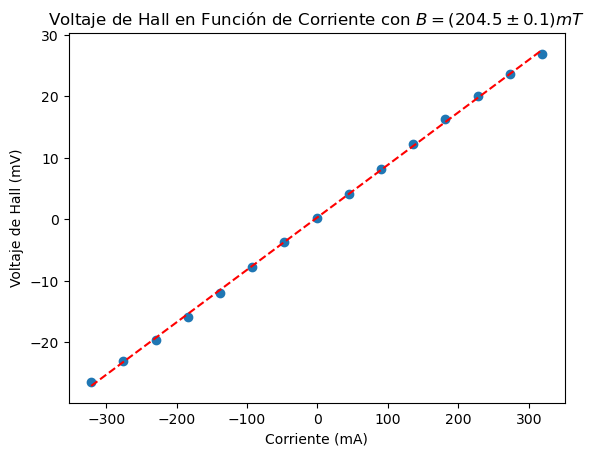

In [28]:
plt.scatter(X, Y)
plt.plot(X, model4, color = 'red', linestyle='--')
plt.title('Voltaje de Hall en Función de Corriente con ' + r'$B = (204.5\pm 0.1)mT$')
plt.xlabel('Corriente (mA)')
plt.ylabel('Voltaje de Hall (mV)')
#plt.savefig('Bcte_p_0.90A.png', format='png')

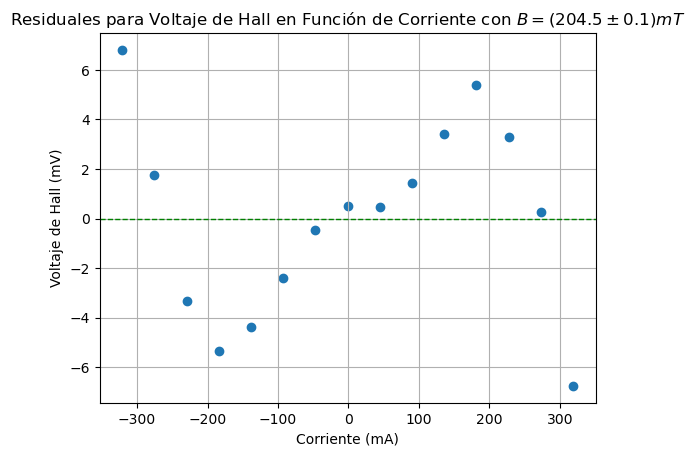

In [29]:
res = (Y - model4)/Yerr

fig2, (ax2) = plt.subplots(1, 1)

ax2.scatter(X, res)
ax2.axhline(0, color='green', linewidth=1, linestyle='--')

ax2.set_xlabel('Corriente (mA)')
ax2.set_ylabel('Voltaje de Hall (mV)')
ax2.set_title('Residuales para Voltaje de Hall en Función de Corriente con ' + r'$B = (204.5\pm 0.1)mT$')
ax2.grid()

plt.savefig('Bcte_p_0.90A_residual.png', format='png')

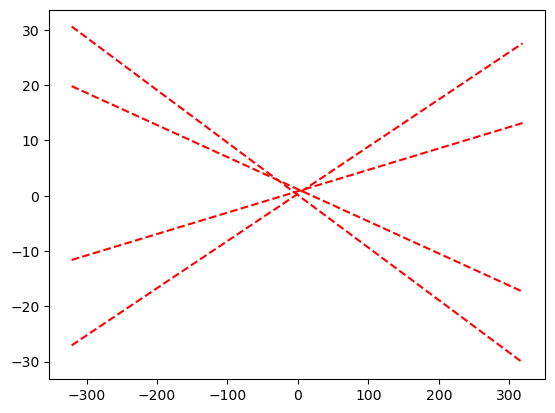

In [31]:
plt.plot(X, model1, color = 'red', linestyle='--')
plt.plot(X, model2, color = 'red', linestyle='--')
plt.plot(X, model3, color = 'red', linestyle='--')
plt.plot(X, model4, color = 'red', linestyle='--')